'vis' (Interferometric Visibility) Dataset
===============================

Background
-----------------

An interferometer measures *fringes*.
When an unresolved source is observed by 2 telescopes,
one can see the Airy disk (corresponding to the diameter D)
together with fringes originating from interference of light (corresponding to the baseline B).
In optical, the light from telescopes is kept coherent
with help of a delay line.
In radio, the signal from antennas is sent to a correlator
and processed off-line.

```
        *        source      
                            
  -------------  wavefront   
                             
  | |       | |  2 telescopes
  |_|       |_|  diameter D  
   |         |               
   \---\ /---/   baseline B  
       | |       delay line  
       \ /                   
                             
       |||       fringes     
```

For a point-like, monochromatic source,
the intensity in the focal plane is simply:

`I(alpha, alpha') = I_0 (1 + cos(k(alpha + alpha')B))`

where
I_0 denotes the mean intensity,
k = 2 pi/lambda, the wave number,
alpha, alpha', the angles inside and in front of the instrument, and
B, the projected baseline.

Note: For a general orientation, \vec alpha, \vec alpha', and (u, v) = \vec B/lambda are used.

For an extended, monochromatic source, we should integrate over alpha':

`I(alpha) = \int I(alpha, alpha') dalpha' = \int I_0 dalpha' + Re \int I_0 exp(-i k(alpha + alpha')B) dalpha'`

where
Re denotes the real part.
Grouping together the terms dependent on alpha and alpha':

`I(alpha) = I_0(1 + Re(mu(B) exp(-i k alpha B)))`

`mu(B) = 1/I_0 \int I(alpha') exp(-i k alpha' B) dalpha'`

where
the complex factor mu(B) determines the *visibility* (contrast) of the fringes.
It corresponds to the spatial Fourier transform of the intensity of the source, I(alpha').
This is the statement of the van Cittert and Zernike theorem.

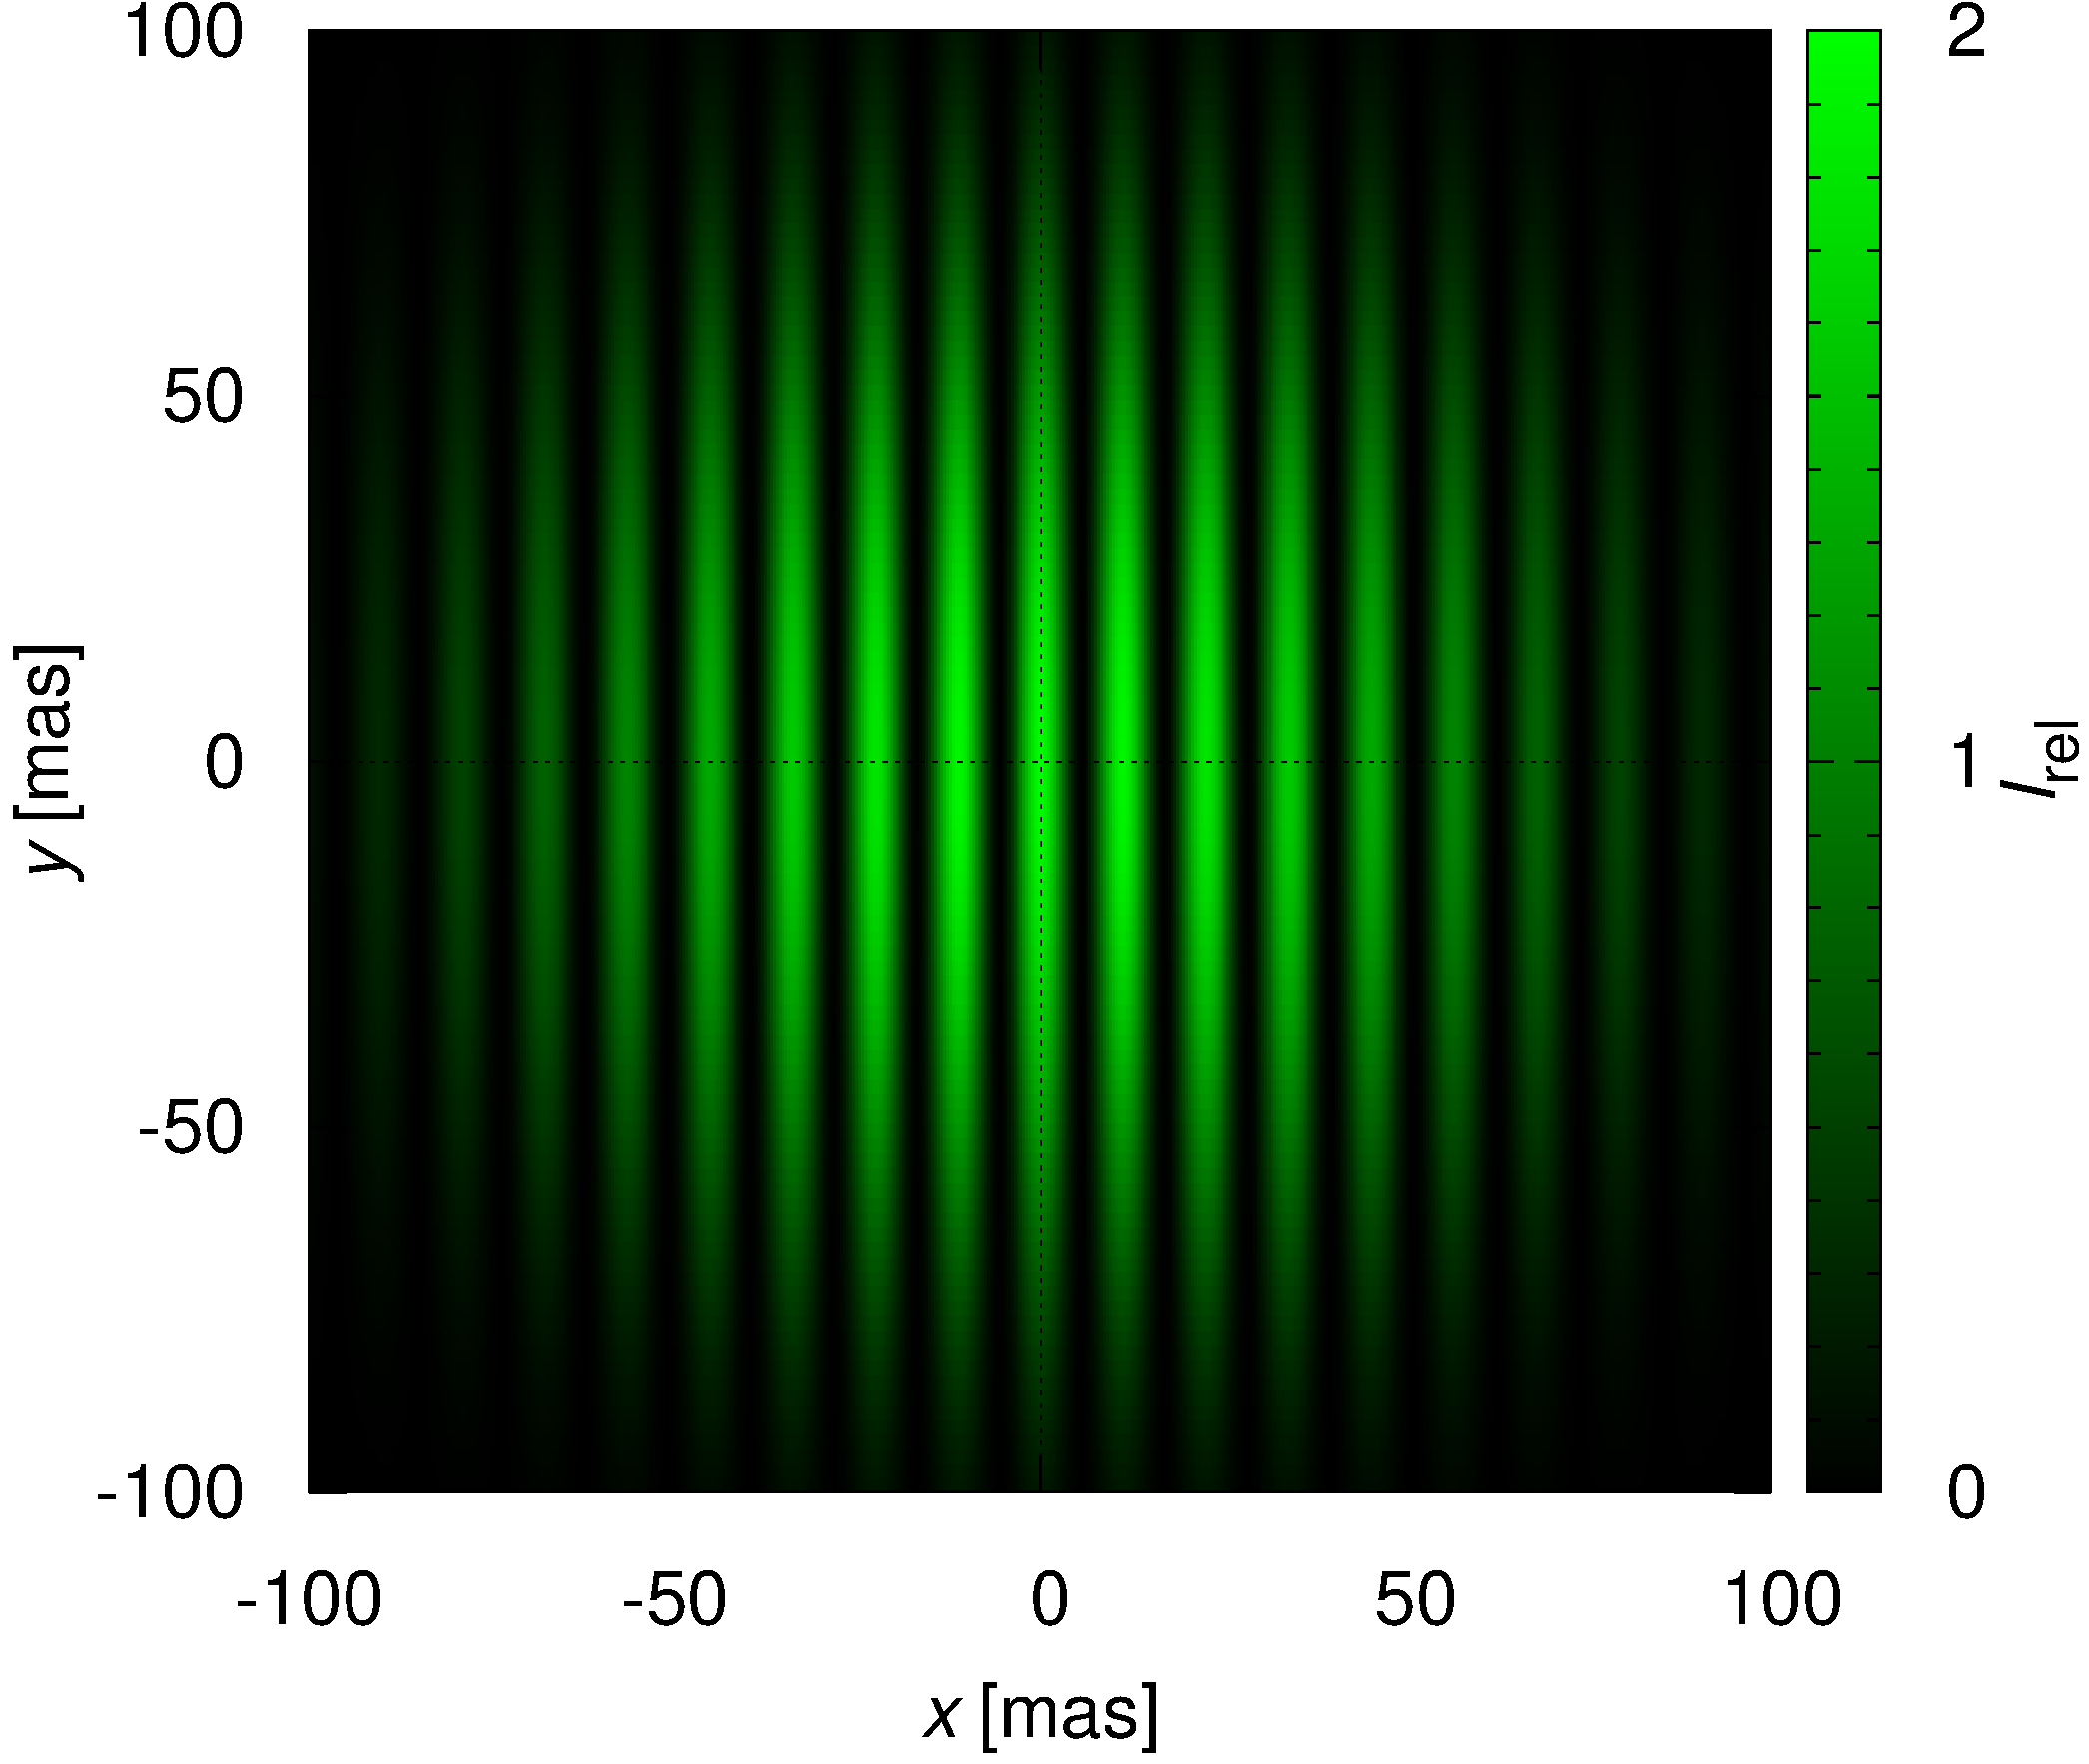

Example of an interferometric observation of a disk, phi = 1 mas, D = 1 m, B = 10 m, lambda = 550 nm, no seeing, no bandwidth.

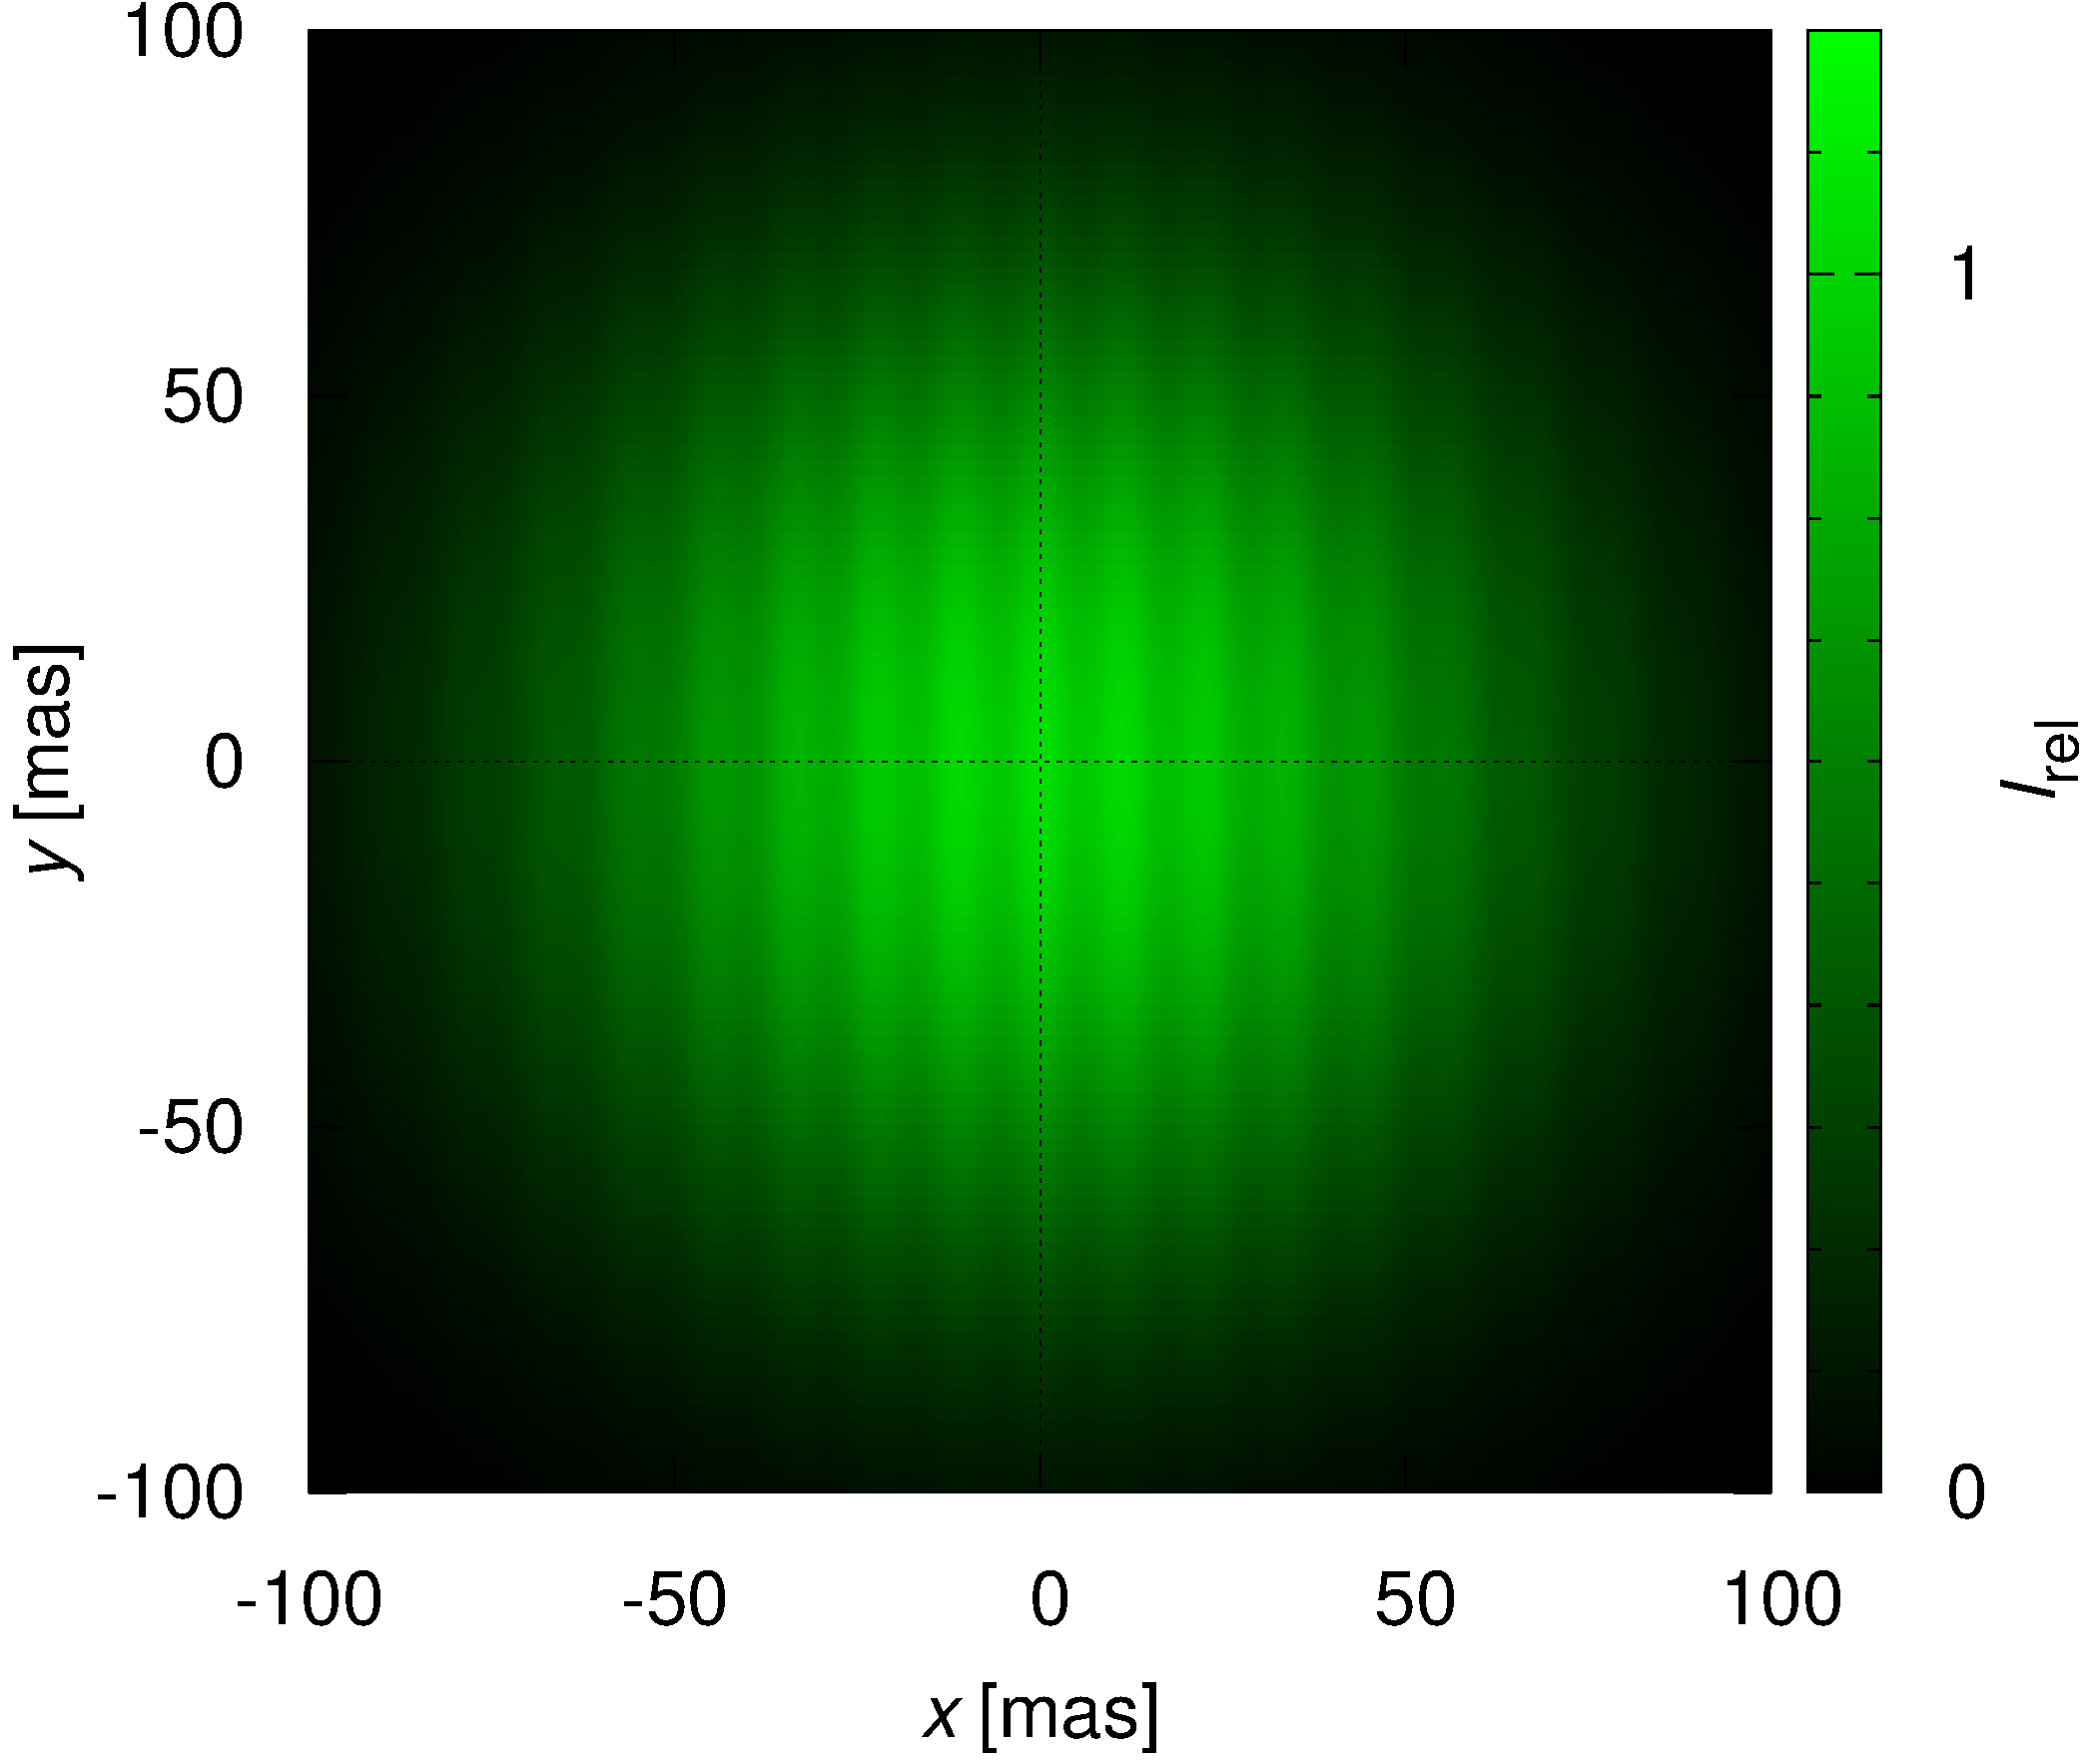

Ditto for B = 130 m (w. rearranged pupils, i.e., constant # of fringes). A *drop* in visibility (contrast) of fringes is the goal!

Setup
--------

As a preparatory task, we create a file `Vis.dat`, containing common interferometric data. Apart from times, we also need baselines (u, v) and wavelengths (and bandwidths). Here, an interferometer composed of 2 telescopes "observed" on baselines up to 330 m (like CHARA). For simplicity, the "observed" squared visibility |V|^2 = mu mu* was set to 0.0. Of course, in real life this value is observed (between 0 and 1), as read from OIFITS files.

In [1]:
f = open("Vis.dat", "w")
f.write("# time u v wavelength bandwidth vis sigma\n")

t = 0.25               # d
u1 = 0.0               # m
u2 = 330.0             # m
du = 1.0               # m
v = 0.0                # m
wavelength = 550.0e-9  # m
bandwidth = 100.0e-9   # m
vis = 0.0              # 1
sigma = 0.1            # 1

u = u1
while u < u2:
    u += du
    f.write("%.8f  %.8e  %.8e  %.8e  %.8e  %.8f  %.8f\n" % (t, u, v, wavelength, bandwidth, vis, sigma))

u = 0.0                # m
v1 = 0.0               # m
v2 = 330.0             # m
dv = 1.0               # m

v = v1
while v < v2:
    v += dv
    f.write("%.8f  %.8e  %.8e  %.8e  %.8e  %.8f  %.8f\n" % (t, u, v, wavelength, bandwidth, vis, sigma))

f.close()

Note: Make sure to have the latest version of PHOEBE 2.5 installed (uncomment this line if running in an online notebook session such as colab).

In [2]:
#!pip install -I "phoebe>=2.5,<2.6"

As always, let's do imports and add a new Bundle.

In [3]:
import phoebe

b = phoebe.default_binary()

Parameters
----------------

Next read `Vis.dat` back and add the corresponding 'vis' dataset:

In [4]:
import numpy as np

times, u, v, wavelengths, vises, sigmas = np.loadtxt("Vis.dat", usecols=[0, 1, 2, 3, 5, 6], unpack=True)

b.add_dataset('vis', times=times, u=u, v=v, wavelengths=wavelengths, vises=vises, sigmas=sigmas, if_method='integrate', passband='Johnson:V')

<ParameterSet: 56 parameters | contexts: figure, dataset, compute>

To verify:

In [5]:
print(b.get_dataset(kind='vis'))

ParameterSet: 12 parameters
              times@vis01@dataset: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
                  u@vis01@dataset: [1. 2. 3. ... 0. 0. 0.] m
                  v@vis01@dataset: [  0.   0.   0. ... 328. 329. 330.] m
        wavelengths@vis01@dataset: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07
 5.5e-07] m
              vises@vis01@dataset: [0. 0. 0. ... 0. 0. 0.]
      compute_times@vis01@dataset: [] d
             sigmas@vis01@dataset: [0.1 0.1 0.1 ... 0.1 0.1 0.1]
          if_method@vis01@dataset: integrate
           passband@vis01@dataset: Johnson:V
   intens_weighting@vis01@dataset: energy
    ld_mode@primary@vis01@dataset: interp
   ld_mode@secondary@vis01@dat...: interp


### times
To see explanations:

In [6]:
print(b.get_parameter(kind='vis', qualifier='times', context='dataset'))

Parameter: times@vis01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### u
Alternatively, one can use the `twig` syntax.
 
Note: Here, u coordinate is in metres. Above, (u, v) = B/lambda was in cycles per baseline.

In [7]:
print(b['u@vis01@vis@dataset'])

Parameter: u@vis01@dataset
                       Qualifier: u
                     Description: Observed baseline u
                           Value: [1. 2. 3. ... 0. 0. 0.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### v

In [8]:
print(b['v@vis01@vis@dataset'])

Parameter: v@vis01@dataset
                       Qualifier: v
                     Description: Observed baseline v
                           Value: [  0.   0.   0. ... 328. 329. 330.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### wavelengths

In [9]:
print(b['wavelengths@vis01@vis@dataset'])

Parameter: wavelengths@vis01@dataset
                       Qualifier: wavelengths
                     Description: Observed wavelengths
                           Value: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07 5.5e-07] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### vises

In [10]:
print(b['vises@vis01@vis@dataset'])

Parameter: vises@vis01@dataset
                       Qualifier: vises
                     Description: Observed interferometric squared visibility |V|^2
                           Value: [0. 0. 0. ... 0. 0. 0.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [11]:
print(b['sigmas@vis01@vis@dataset'])

Parameter: sigmas@vis01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty of interferometric visibility
                           Value: [0.1 0.1 0.1 ... 0.1 0.1 0.1]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### if_method
One can choose either a simple model, assuming a limb-darkened disk(s), or a complex model, with integration over meshes --- i.e., applicable to contact or eclipsing binaries.

In [12]:
print(b.get_parameter(qualifier='if_method', context='dataset'))

Parameter: if_method@vis01@dataset
                       Qualifier: if_method
                     Description: Method to use for computing interferometric visibility (must be integrate for eclipse effects)
                           Value: integrate
                         Choices: integrate, simple
                  Constrained by: 
                      Constrains: None
                      Related to: None



### passband
Passband should be in agreement with the wavelenghts, because individual wavelengths are *not* used for computations of mesh intensities. If the range of wavelengths is too extended (V, R, I, ...), split the respective datasets, please.

In [13]:
print(b.get_parameter(qualifier='passband', context='dataset'))

Parameter: passband@vis01@dataset
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:V
                         Choices: SDSS:gprime, Bolometric:900-40000, LSST:g, PanStarrs:i, ZTF:i, Cousins:I, LSST:u, Johnson:V, SDSS:zprime, ZTF:r, LSST:y3, PanStarrs:g, Johnson:R, Johnson:U, Gaia:G, PanStarrs:z, ZTF:g, BRITE:red, LSST:i, Cousins:R, TESS:T, SDSS:r, SDSS:z, KELT:R, SSDSS:rs, LSST:z, Gaia:RVS, Johnson:K, PanStarrs:w, Tycho:V, PanStarrs:open, SSDSS:gs, Stromgren:y, SDSS:uprime, Johnson:J, Johnson:I, SDSS:u, SSDSS:us, Stromgren:b, SWASP:pre2004, PanStarrs:r, PanStarrs:y, SDSS:g, Gaia:RP, Johnson:H, Stromgren:v, Tycho:B, SDSS:iprime, SWASP:default, Stromgren:u, SDSS:i, Hipparcos:Hp, LSST:r, SDSS:rprime, SSDSS:zs, Gaia:BP, Johnson:B, SSDSS:is, BRITE:blue, Kepler:mean
                  Constrained by: 
                      Constrains: None
                      Related to: None



Of course, one has to set up the distance, because 'everything' is affected by angular dimensions!

In [14]:
from astropy import units

b.set_value('distance', context = 'system', value=100*units.pc)

Model
---------

Eventually, a computation is run as:

In [14]:
b.run_compute()

100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


<ParameterSet: 7 parameters | qualifiers: vises, u, comments, if_method, v, wavelengths, times>

Sometimes, when I don't know anything, I list all twigs:

In [15]:
f = open('twigs.txt', 'w')
for twig in b.twigs:
  f.write("%s\n" % (twig))
f.close()

Now, I know that I can print, e.g.:

In [16]:
print(b.get_model(kind='vis'))

ParameterSet: 6 parameters
R              times@latest@model: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
R                  u@latest@model: [1. 2. 3. ... 0. 0. 0.] m
R                  v@latest@model: [  0.   0.   0. ... 328. 329. 330.] m
R        wavelengths@latest@model: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07
 5.5e-07] m
R              vises@latest@model: [0.99995203 0.99980813 0.99956834 ... 0.85391424
 0.85308086 0.85224563]
           if_method@latest@model: integrate


To save results:

In [17]:
times = b['times@vis01@phoebe01@latest@vis@model'].value
u = b['u@vis01@phoebe01@latest@vis@model'].value
v = b['v@vis01@phoebe01@latest@vis@model'].value
wavelengths = b['wavelengths@vis01@phoebe01@latest@vis@model'].value
vises = b['vises@vis01@phoebe01@latest@vis@model'].value

np.savetxt('model.out', np.c_[times, u, v, wavelengths, vises], header='times u v wavelenghts vises')

Plotting
-----------

To plot results:

/home/mira/.local/lib/python3.9/site-packages/phoebe/dependencies/autofig/axes.py:1273: UserWarning: Attempting to set identical left == right == 0.25 results in singular transformations; automatically expanding.
  ax.set_xlim(xlim)


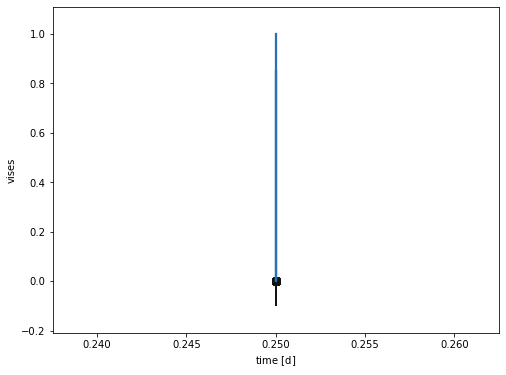

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [18]:
b.plot(show=True)

Well, this was for a single time, wasn't it? However, it is much more interesting to see the dependence on baselines!

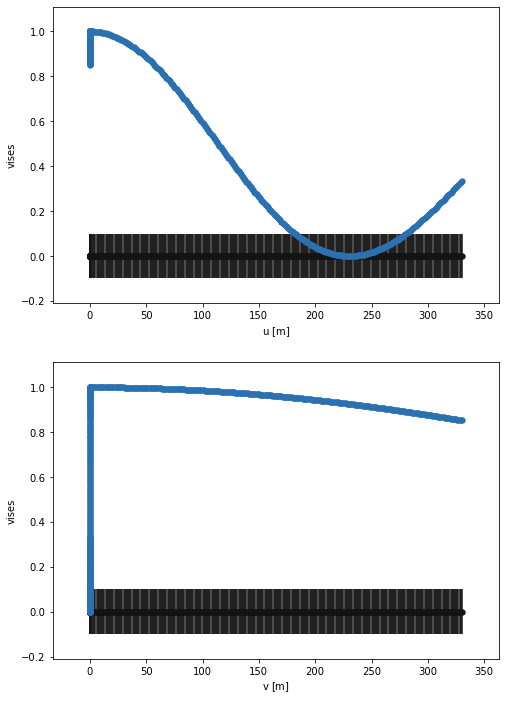

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [19]:
b.plot(x='u', marker='.', linestyle='none', show=False)
b.plot(x='v', marker='.', linestyle='none', show=True)

|V|^2 vs. u is sensitive to the mutual separation of `b.default_binary()`, which is 5.3 R_S. On the other hand, |V|^2 vs. v is sensitive to the diameters of components, which is 2.0 R_S, hence the visibility decreases more slowly. The smaller angular size, the slower decrease of |V|^2, and *vice versa*. Cf.

100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


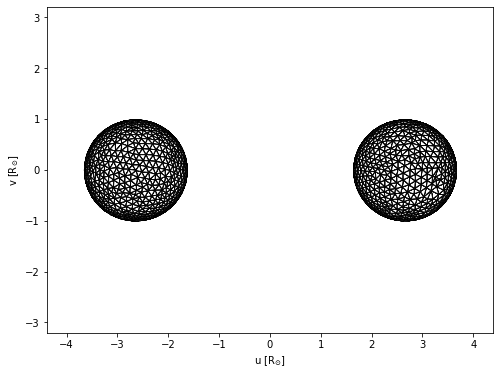

(<autofig.figure.Figure | 1 axes | 10 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [23]:
b.add_dataset(kind='mesh', compute_times=[0.25])
b.run_compute()
b.plot(kind='mesh', show=True)

If more baselines were set up, the spatial Fourier transform would be seen more clearly:

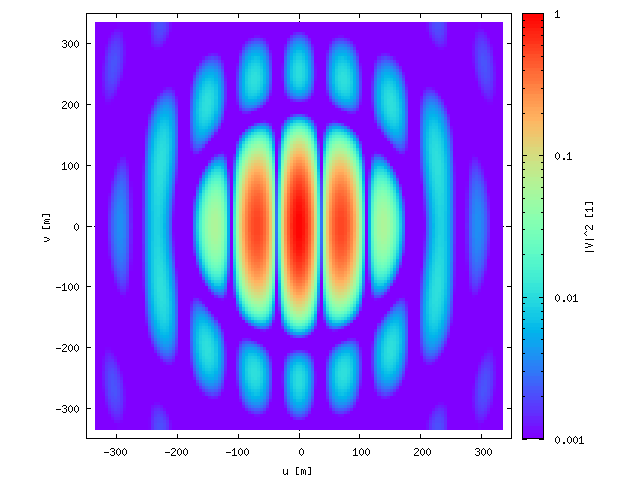
Note: The distance was 10 pc, in order to see more visibility maxima and minima. 